## Iris Recognition

Latihan Data Science paling dasar. Ini tentang klasifikasi. Pada notebook ini yang dipakai adalah dataset iris yang biasa dipakai untuk belajar data science.

#### Import Package

Mari kita melakukan import package terlebih dahulu. Package yang digunakan adalah package pandas dan sklearn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### Load Data dan Melihat Karakteristik Data

In [3]:
dataset = pd.read_csv('IRIS.csv')

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Pada dataset ini, jumlah data adalah 150 dengan 4 atribut dan terdiri dari 3 kelas seperti yang dideskripsikan di bawah ini

In [6]:
#melihat ada berapa kelas
kelas = dataset.groupby(["species"]).size()
kelas

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Untuk inputan label dalam proses training, harus diubah dalam bentuk integer agar bisa dijalankan di classifier dari sklearn. Oleh karena itu, dilakukan proses konversi seperti dibawah ini

In [7]:
biner = {'species': {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}}
dataset.replace(biner,inplace=True)

Disini kita juga dapat melihat karakteristik data berdasarkan sepal dan petal yang divisualisasikan dengan menggunakan scatter plot

Scatter Plot berdasarkan sepal


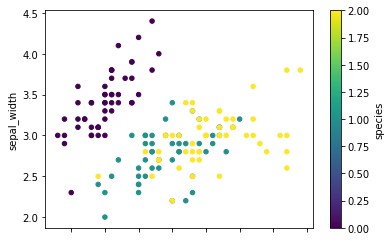

In [86]:
#visualisasi pake scatter plot berdasarkan sepal
print('Scatter Plot berdasarkan sepal')
ax2 = dataset.plot.scatter(x='sepal_length', y='sepal_width', c='species',colormap='viridis')

Scatter Plot berdasarkan petal


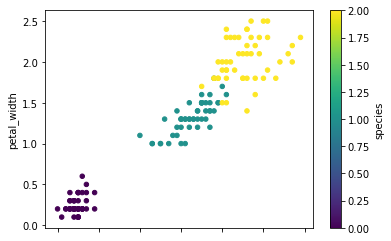

In [87]:
print('Scatter Plot berdasarkan petal')
ax3 = dataset.plot.scatter(x='petal_length', y='petal_width', c='species',colormap='viridis')

#### Proses Klasifikasi

Oke, kita akan lanjut ke proses klasifikasi. Pertama-tama kita akan membagi data menjadi data train dan data test. Namun sebelumnya, kita harus memisahkan label dengan datanya seperti pada cara dibawah ini

In [9]:
#pisahkan label dengan data
y = dataset.species
X = dataset.drop('species', axis=1)

Setelah itu, kita akan membagi data menjadi 70% data training dan 30% data test. Pada notebook ini, cara pembagiannya adalah dengan menggunakan train_test_split dari package sklearn. 

In [10]:
#bagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Jumlah data test dan data train dapat dilihat sebagai berikut

In [14]:
print('Jumlah Data Train : ',X_train.shape[0])
print('Jumlah Data Test : ',X_test.shape[0])

Jumlah Data Train :  105
Jumlah Data Test :  45


Pada notebook ini, kita akan menggunakan dua metode klasifikasi untuk kita lihat perbandingannya. Metode tersebut adalah sebagai berikut
1. Gaussian Naive Bayes
2. Support Vector Machine

##### Gaussian Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB
# melakukan training
gnb = GaussianNB()
train_fit = gnb.fit(X_train, y_train)
# memberikan prediksi dari data test
y_pred = gnb.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
# menampilkan nilai akurasi
accuracy_score(y_test, y_pred)

0.9777777777777777

##### Support Vector Machine (One vs One)

In [92]:
from sklearn import svm
#svm one aganist one
y_train = y_train.astype('float')
y_test = y_test.astype('float')
# melakukan training
clf = svm.SVC(gamma=0.1, decision_function_shape='ovo')
clf.fit(X_train, y_train) 
# memberikan prediksi dari data test
y_pred = clf.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
# menampilkan nilai akurasi
accuracy_score(y_test, y_pred)

1.0